# Proposal Topic Modelling

In [23]:
# Import libs
import json
import os
import pandas as pd
import re

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
staff = ["Andrew Hellman","John Butt","Charlie Petersen","Conrad Ramirez","Doug Johnson","Eric Bodenstab",
         "Mary Boechler","Matt Henderson","Mridhula Manoj","Lindsey Wickman","Luis Acosta","Erik Carlson",
         "Paul Deutsch","Jen Hanley","J. Luke Hodges","Will Kerns","Abdullah Kurkcu","Nikki Olson","Bob Smith",
         "Ron Lowe","Angela Eickelman","Robbert Wieder","Jason Berner","Rebecca Berner","Molly Thiebaut",
         "Joseph El- Hehiawy","Mustafa Al Ogaila","Bill Mischlich","Dave Wieder","Gabe Maliscke","Clint Knutson",
         "Don Nelson","Dominique Lopez","Grant Seger","Chad Stensland","Corey Maynard","Jason Orban","Morgan Wrasper",
         "Nick State","Carter Dahl","Jimmy Coffee","Brad Stangohr","Alex Ranz","AJ Tuck","Brad Niemela",
         "Dustin Kulseth","Marty Jenson","Jon Yocom","Brandon Bucholz","Bennett Pederson","Casey Bekkerus",
         "Chris Greve","Chris Smaaladen","Joe Wade","Justin Johnson","Lyle Zeren","Naga Talluri","Paul Pebler",
         "Reece Skarie","Thomas Reisdorf","Travis Berends","Travis DeJong","Zak Grabowski","Paul Moreau",
         "Steve Windish","Kory Kleinknecht","John Kilpatrick","Daylin Gray","Thomas Fakler","Josh Kueber",
         "Laeken Carey","Clark Roberts","Rachel Heinzen","Melanie Muncy","Tanner Blinsky","Sawyer Kenney",
         "Luke Arnold","Rick Archer","Roger Clay","Brett Lovro","Brian Hiles","Charlie Bechtold","Cassie Borden","Jordon Gall"]

city_county = ['Ulteig','city','county','town','CDOT', 'Adams', 'Arapahoe', 'Arvada', 'Boulder', 'Brighton', 'Broomfield', 'Buena Vista', 'Castle Pines', 
               'Castle Rock', 'Centennial', 'Clear Creek', 'Commerce City', 'Denver', 'Englewood', 'Federal Heights',
              'Fort Morgan', 'Greeley', 'Greenwood Village', 'Jefferson', 'Lafayette', 'Lochbuie', 'Mesa', 'Northglenn', 'Parker',
              'Steamboat', 'Superior', 'Vail', 'Weld', 'Westminster', 'Windsor']

staff = [x.lower() for x in staff]
city_county = [x.lower() for x in city_county]


C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Import files -> Create DF 
directory = '../jsons/'
df = pd.DataFrame(columns=["Filename", "Text"])

# Convert the titles to lowercase
df['Text'] = df['Text'].map(lambda x: x.lower())
# Remove punctuation
df['Text'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'].apply(lambda x: [item for item in x if item not in stop])


# iterate over files in that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    text = ""
    
    # Dump to file
    with open(f, "r") as json_file: 
        data = json.load(json_file)
        
    for key in data:
        x = data[key].lower()
        key = key.lower()
        for member in staff:
            x = x.replace(member.lower(), ' ')
            key = key.replace(member.lower(), ' ')
        for city in city_county:
            x = x.replace(city.lower(), ' ')
            key = key.replace(city.lower(), ' ')
        text = text + " " + key + " " + x
    filename = filename.rstrip(".json")
    df = df.append({"Filename":filename, "Text":text}, ignore_index=True)
          
df.head()

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:8: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<>:8: DeprecationWarning: invalid escape sequence \.
<ipython-input-25-b0df88721ad7>:8: DeprecationWarning: invalid escape sequence \.
  df['Text'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


,Filename,Text
0,17.00532 Buena Vista CO_Midland Hills Bridge T...,1. scope of work a. approach b. crew & volunt...
1,18.00308 Jefferson County_RoadwaySignage_Mar13...,100% employee-owned office 5575 dtc parkw...
2,19.00064_City of Centennial Orchard Road Trail...,design experience project type role client ...
3,19.00150_Town of Vail_Gore Valley Trail_Feb19_...,"office 5575 dtc parkway suite 200 , co 8..."
4,19.01863 CDOT R2 I-25 Raton Pass Corridor Prop...,key personnel & organizational chart has as...


In [26]:
# Remove punctuation
df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
#df['text_processed'].head()

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
<ipython-input-26-33697d476421>:2: DeprecationWarning: invalid escape sequence \.
  df['text_processed'] = df['Text'].map(lambda x: re.sub('[,\.!?]', '', x))


C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


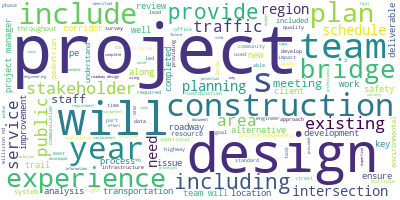

In [27]:
from wordcloud import WordCloud

# Join texts
long_string = ','.join(list(df['text_processed'].values))

# Generate a word cloud
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# LDA

In [58]:
import gensim
from gensim.utils import simple_preprocess
import nltk
import spacy
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['design', 'project', 'ulteig', 'team', 'projects', 'nd'])    # Note - add or remove misc. stopwords here


bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# send to list
data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_words = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
import gensim

# User input: number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=1,)

'''
# Print the Keyword in the topics
from pprint import pprint
pprint(lda_model.print_topics())
'''

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n# Print the Keyword in the topics\nfrom pprint import pprint\npprint(lda_model.print_topics())\n'

## Hyperparameter Tuning

In [57]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  nan


C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


## Visualization

In [56]:
import pickle 
import pyLDAvis

# import pyLDAvis
try:
    raise ImportError
    import pyLDAvis.gensim as gm #version 3.2.2
except ImportError:
    import pyLDAvis.gensim_models as gm 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_' + str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gm.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002882  0.003031       1        1  35.823200
0      0.000090 -0.000670       2        1  34.489419
4      0.002409 -0.003198       3        1  10.873125
3     -0.004944  0.000134       4        1   9.482206
2     -0.000437  0.000704       5        1   9.332049, topic_info=               Term        Freq       Total Category  logprob  loglift
501            plan  569.000000  569.000000  Default  30.0000  30.0000
337         include  759.000000  759.000000  Default  29.0000  29.0000
151    construction  529.000000  529.000000  Default  28.0000  28.0000
261      experience  476.000000  476.000000  Default  27.0000  27.0000
709  transportation  371.000000  371.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
240     engineering   22.493155  261.208218   Topic5  -5.4903  -0.0804
381            lead   21.943829  251.411869   Topic5  -5.5150  -0.0669
761            work   27.809463  384.920053   Topic5  -5.2782  -0.2559
334     improvement   20.284627  235.453566   Topic5  -5.5937  -0.0799
617        schedule   19.244017  219.409052   Topic5  -5.6463  -0.0620

[442 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1         1  0.398476  able
1         2  0.301287  able
1         3  0.097189  able
1         4  0.116627  able
1         5  0.087470  able
...     ...       ...   ...
770       1  0.292487  year
770       2  0.367392  year
770       3  0.114141  year
770       4  0.131976  year
770       5  0.092740  year

[1160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


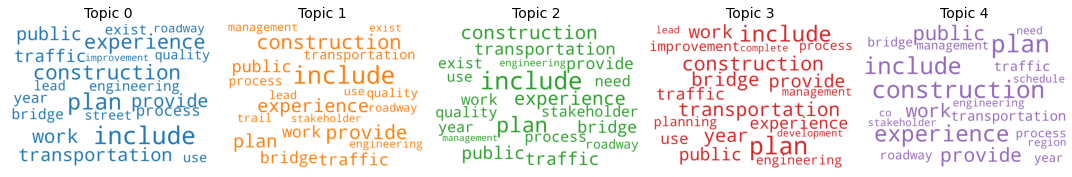

In [51]:
# Wordcloud of LDA, top 10 words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

topics = lda_model.show_topics(num_topics=5, num_words=20, formatted=False)

# Note - change first 2 numbers (row, cols) when changing num. of topics
fig, axes = plt.subplots(1, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud = WordCloud(stopwords=stop_words, background_color='white', width=2500, height=1800, max_words=20, colormap='tab10', \
                      color_func=lambda *args, **kwargs: cols[i], prefer_horizontal=1.0)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=14))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# NMF - better for texts w similar topics

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF IDF
texts = df['text_processed']
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf.toarray()

# NMF - Input: change n_components to desired number of topics
nmf_model = NMF(n_components=5)
nmf_model.fit(tfidf)

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=5)

C:\Users\abdullah.kurkcu\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


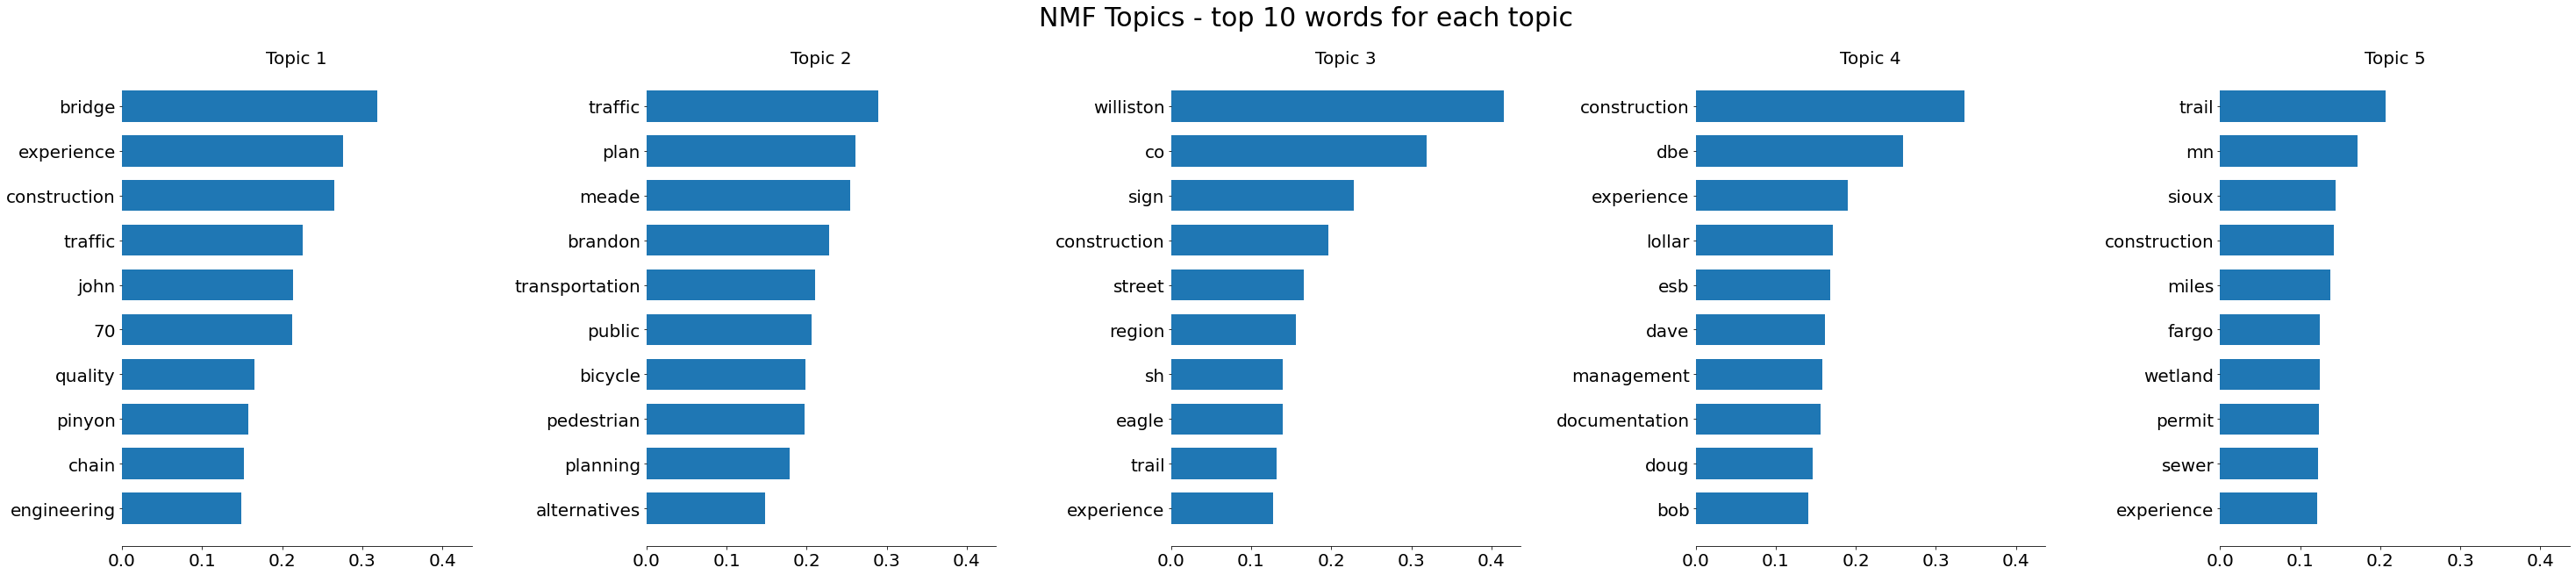

In [53]:
# User inputs: # of words to display, and major title
n_top_words = 10
title = "NMF Topics - top " + str(n_top_words) + " words for each topic"

# plot top 10 words for each topic
feature_names = tfidf_vectorizer.get_feature_names()
fig, axes = plt.subplots(1, 5, figsize=(50, 10), sharex=True)    # Note - change (rows, cols) to match num. topics
axes = axes.flatten()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',
                 fontdict={'fontsize': 20})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=30)

plt.subplots_adjust(wspace=0.50)
plt.show()